# 1 - Perkenalan

* Nama       : Luvi Puspitasari
* Batch      : FTDS-012
* Dataset    : Water Potability
* Source Dataset  : ("https://www.kaggle.com/datasets/adityakadiwal/water-potability")

# 2 - Libraries

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Models Definition
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer


# Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

# Model Training
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# Model Evaluations
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.metrics import accuracy_score,classification_report,roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import pickle

import warnings
warnings.filterwarnings("ignore")

# 3 - Loading Dataset

Akses ke air minum yang aman sangat penting untuk kesehatan, hak asasi manusia dan komponen kebijakan yang efektif untuk perlindungan kesehatan. Hal ini penting sebagai masalah kesehatan dan pembangunan di tingkat nasional, regional dan lokal. Di beberapa daerah, telah terbukti bahwa investasi dalam penyediaan air dan sanitasi dapat menghasilkan keuntungan ekonomi bersih, karena pengurangan efek kesehatan yang merugikan dan biaya perawatan kesehatan lebih besar daripada biaya melakukan intervensi.

| Indikator | Penjelasan | 
| ----------- | :---------: |
| ph | PH merupakan parameter penting dalam mengevaluasi keseimbangan asam-basa air. Ini juga merupakan indikator kondisi asam atau basa status air. WHO telah merekomendasikan batas maksimum pH yang diizinkan dari 6,5 hingga 8,5. Rentang investigasi saat ini adalah 6,52-6,83 yang berada dalam kisaran standar WHO |
| Hardness | Kesadahan air terutama disebabkan oleh garam kalsium dan magnesium. Garam-garam ini larut dari endapan geologis yang dilalui air. Lamanya waktu kontak air dengan bahan penghasil kesadahan membantu menentukan berapa banyak kesadahan yang ada dalam air baku. Kesadahan awalnya didefinisikan sebagai kapasitas air untuk mengendapkan sabun yang disebabkan oleh Kalsium dan Magnesium.|
| Solids (Total dissolved solids - TDS) | Air memiliki kemampuan untuk melarutkan berbagai mineral atau garam anorganik dan organik seperti kalium, kalsium, natrium, bikarbonat, klorida, magnesium, sulfat, dll. Mineral ini menghasilkan rasa yang tidak diinginkan dan warna yang encer dalam penampilan air. Ini adalah parameter penting untuk penggunaan air. Air dengan nilai TDS yang tinggi menunjukkan bahwa air tersebut sangat termineralisasi. Batas yang diinginkan untuk TDS adalah 500 mg/l dan batas maksimum adalah 1000 mg/l yang ditentukan untuk tujuan minum. |
| Chloramines | Klorin dan kloramin adalah disinfektan utama yang digunakan dalam sistem air publik. Kloramin paling sering terbentuk ketika amonia ditambahkan ke klorin untuk mengolah air minum. Kadar klorin hingga 4 miligram per liter (mg/L atau 4 bagian per juta (ppm)) dianggap aman dalam air minum.|
| Sulfate | Sulfat adalah zat alami yang ditemukan di mineral, tanah, dan batuan. Mereka hadir di udara ambien, air tanah, tanaman, dan makanan. Penggunaan komersial utama sulfat adalah dalam industri kimia. Konsentrasi sulfat dalam air laut adalah sekitar 2.700 miligram per liter (mg/L). Ini berkisar antara 3 sampai 30 mg/L di sebagian besar persediaan air tawar, meskipun konsentrasi yang jauh lebih tinggi (1000 mg/L) ditemukan di beberapa lokasi geografis. |
| Conductivity | Air murni bukanlah penghantar arus listrik yang baik, melainkan isolator yang baik. Peningkatan konsentrasi ion meningkatkan konduktivitas listrik air. Umumnya, jumlah padatan terlarut dalam air menentukan konduktivitas listrik. Konduktivitas listrik (EC) sebenarnya mengukur proses ionik dari suatu larutan yang memungkinkannya untuk mentransmisikan arus. Menurut standar WHO, nilai EC tidak boleh melebihi 400 μS/cm |
| Organic_carbon | Total Organic Carbon (TOC) di perairan sumber berasal dari bahan organik alami (NOM) yang membusuk serta sumber sintetis. TOC adalah ukuran jumlah total karbon dalam senyawa organik dalam air murni. Menurut US EPA < 2 mg/L sebagai TOC pada air olahan/minum, dan <4 mg/Lit pada sumber air yang digunakan untuk pengolahan. |
| Trihalomethanes  | THM adalah bahan kimia yang dapat ditemukan dalam air yang diolah dengan klorin. Konsentrasi THM dalam air minum bervariasi sesuai dengan tingkat bahan organik di dalam air, jumlah klorin yang dibutuhkan untuk mengolah air, dan suhu air yang diolah. Kadar THM hingga 80 ppm dianggap aman dalam air minum. |
| Turbidity | Kekeruhan air tergantung pada jumlah zat padat yang ada dalam keadaan tersuspensi. Ini adalah ukuran sifat pemancar cahaya air dan tes ini digunakan untuk menunjukkan kualitas pembuangan limbah sehubungan dengan materi koloid. Nilai rata-rata kekeruhan yang diperoleh untuk Kampus Wondo Genet (0,98 NTU) lebih rendah dari nilai rekomendasi WHO sebesar 5,00 NTU. |
| Potability | Menunjukkan apakah air aman untuk dikonsumsi manusia di mana 1 berarti Dapat diminum dan 0 berarti Tidak dapat diminum.|

***ASUMSI REAL LIFE:***
- Sebuah perusahaan air minum ingin investasi pembangunan Perusahaan penyedia air di Kabupaten Malang, Jawa Timur. Dalam hal ini diperlukan data-data penunjang untuk meyakinkan kepada pihak investor bahwa proyek ini worth it dan bisa menjadi salah satu daya tarik pengunjung yang mana air berasal dari pegunungan daerah kabupaten Malang dan bisa dimanfaatkan oleh pengusaha Hotel, Resort, maupun Villa yang membutuhkan daya tarik lain dalam melayani turis.

In [2]:
# Load dataset

data = pd.read_csv('water_potability.csv')
data

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


Berikut adalah data-data yang terkumpul, total keseluruhan ada 3275 sampel dengan 9 parameter.

In [3]:
# Duplicate Dataset

dataset = data.copy()

In [4]:
# Rename Columns

dataset.rename(columns={'Hardness':'Hardness_mg/L', 'Chloramines':'Chloramines_ppm', 'Solids': 'Solids_ppm', 'Sulfate': 'Sulfate_mg/L', 'Conductivity': 'Conductivity_μS/cm', 'Organic_carbon': 'Organic_carbon_ppm', 'Trihalomethanes': 'Trihalomethanes_μg/L', 'Turbidity': 'Turbidity_NTU'}, inplace=True)
dataset.T

,0,1,2,3,4,5,6,7,8,9,...,3266,3267,3268,3269,3270,3271,3272,3273,3274,3275
ph,NaN,3.716080,8.099124,8.316766,9.092223,5.584087,10.223862,8.635849,NaN,11.180284,...,8.372910,8.989900,6.702547,11.491011,6.069616,4.668102,7.808856,9.419510,5.126763,7.874671
Hardness_mg/L,204.890455,129.422921,224.236259,214.373394,181.101509,188.313324,248.071735,203.361523,118.988579,227.231469,...,169.087052,215.047358,207.321086,94.812545,186.659040,193.681735,193.553212,175.762646,230.603758,195.102299
Solids_ppm,20791.318981,18630.057858,19909.541732,22018.417441,17978.986339,28748.687739,28749.716544,13672.091764,14285.583854,25484.508491,...,14622.745494,15921.412018,17246.920347,37188.826022,26138.780191,47580.991603,17329.802160,33155.578218,11983.869376,17404.177061
Chloramines_ppm,7.300212,6.635246,9.275884,8.059332,6.546600,7.544869,7.513408,4.563009,7.804174,9.077200,...,7.547984,6.297312,7.708117,9.263166,7.747547,7.166639,8.061362,7.350233,6.303357,7.509306
Sulfate_mg/L,368.516441,NaN,NaN,356.886136,310.135738,326.678363,393.663396,303.309771,268.646941,404.041635,...,NaN,312.931022,304.510230,258.930600,345.700257,359.948574,NaN,NaN,NaN,NaN
Conductivity_μS/cm,564.308654,592.885359,418.606213,363.266516,398.410813,280.467916,283.651634,474.607645,389.375566,563.885481,...,464.525552,390.410231,329.266002,439.893618,415.886955,526.424171,392.449580,432.044783,402.883113,327.459760
Organic_carbon_ppm,10.379783,15.180013,16.868637,18.436524,11.558279,8.399735,13.789695,12.363817,12.706049,17.927806,...,11.083027,9.899115,16.217303,16.172755,12.067620,13.894419,19.903225,11.039070,11.168946,16.140368
Trihalomethanes_μg/L,86.990970,56.329076,66.420093,100.341674,31.997993,54.917862,84.603556,62.798309,53.928846,71.976601,...,38.435151,55.069304,28.878601,41.558501,60.419921,66.687695,NaN,69.845400,77.488213,78.698446
Turbidity_NTU,2.963135,4.500656,3.055934,4.628771,4.075075,2.559708,2.672989,4.401425,3.595017,4.370562,...,4.906358,4.613843,3.442983,4.369264,3.669712,4.435821,2.798243,3.298875,4.708658,2.309149
Potability,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Dataset Overview**

In [5]:
# Overview of Data
dataset.info()
dataset.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ph                    2785 non-null   float64
 1   Hardness_mg/L         3276 non-null   float64
 2   Solids_ppm            3276 non-null   float64
 3   Chloramines_ppm       3276 non-null   float64
 4   Sulfate_mg/L          2495 non-null   float64
 5   Conductivity_μS/cm    3276 non-null   float64
 6   Organic_carbon_ppm    3276 non-null   float64
 7   Trihalomethanes_μg/L  3114 non-null   float64
 8   Turbidity_NTU         3276 non-null   float64
 9   Potability            3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


,ph,Hardness_mg/L,Solids_ppm,Chloramines_ppm,Sulfate_mg/L,Conductivity_μS/cm,Organic_carbon_ppm,Trihalomethanes_μg/L,Turbidity_NTU,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


Data Info :
1. Terdapat missing value di ph, Sulfate, dan Trihalomethannes
2. Keseluruhan feature dtypr berupa float64, kecuali kolom target int64.

Columns Describe :
1. ph : pH air berada di range 0 - 14, dan rata-rata untuk ph air yang ada di dataset ada di angka 7.08. ph tersebut sudah sesuai dengan rekomendasi WHO
2. Hardness(mg/L) : kapasitas air untuk mengendapkan air sabun ada di rata-rata 196.36 mg/L, dengan Hardness tertinggi ada di angka 323 mg/L,
3. Solids : total padatan yang terlarut rata-rata dari research ada diangka 22.014 (ppm), jika di convert ke satuan mg/L menjadi 21.988(mg/L) ~(1 ppm = 0.99 mg/L). angka tersebut sangat tinggi dan tidak direkomenasikan jika akan dimanfaatkan sebagai air minum 
4. Chloramines(ppm) : jumlah kandungan klorin pada air, rata-rata ada di angka 7.122 yang mana untuk rekomendasi hanya dibatas 4 mg/L.
5. Sulfate(mg/L) :jumlah sulfate yang larut pada air, 333 mg/L, jumlah yang cukup aman untuk air minum,
6. Conductivity(μS/cm) : konduktivitas listrik pada air dengan rata-rata 426.2 μS/cm melebihi ya g dianjurkan, yang mana harus < 400 μS/cm, tetapi ternyata untuk angka tertinggi ada di 753 μS/cm,
7. Organic_carbon(ppm) : jumlah karbon organik, dalam rata-rata data ada diangka 14,28 ppm (17,10 mg/L) terlalu tinggi jika disandingkan dengan rekon=mendasi yang mana harus < 2 mg/L untuk standard air minum,
8. Trihalomethanes(μg/L) : jumlah trihalothane dengan rata-rata 66.39 μg/L, dengan rekomendasi standart untuk air minum 80 ppm (79.2 mg/L), hal tersebut masih dapat direkomndasikan untuk,
9. Turbidity(NTU) : tingkat kekeruhan pada air, utnuk rata-rata ada diangka 3.9 NTU yang mana masih masuk dalam rekomndasi kualitas air bersih,
10. Potability : rekomdasi untuk dapat diminum atau tidak.

In [6]:
# Dataset Shape

dataset.shape

(3276, 10)

> Dataset terdiri dari 3276 rows dan 10 columns

In [7]:
# head 
dataset.head(5)

,ph,Hardness_mg/L,Solids_ppm,Chloramines_ppm,Sulfate_mg/L,Conductivity_μS/cm,Organic_carbon_ppm,Trihalomethanes_μg/L,Turbidity_NTU,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


> Data 5 teratas terdapat missing value pada ph  dan Sulfate.

In [8]:
# tail
dataset.tail(5)

,ph,Hardness_mg/L,Solids_ppm,Chloramines_ppm,Sulfate_mg/L,Conductivity_μS/cm,Organic_carbon_ppm,Trihalomethanes_μg/L,Turbidity_NTU,Potability
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1
3275,7.874671,195.102299,17404.177061,7.509306,NaN,327.459760,16.140368,78.698446,2.309149,1


> Selain itu terdapat missing values juga di Sulfate pada 5 data paling akhir

# 4 - Exploratory Data Analysis

**CASE :**
> - Data berikut adalah data yang dikumpulkan pada saat musim kemarau, sehingga pada saat pengetesan air di hulu sungai sampai dengan hilir sungai tidak terdapat sedimen yang dibawa air hujan.
> - Pengambilan sampel berada disekitar sumber mata air sampai dengan hilir sungai yang akan direncanakan sebagai lokasi pengembangan distribusi air minum dan air bersih,
> - Dalam data ini hanya fokus kepada kualitas air saja, tidak sampai dengan distribusi air minum kepada pelanggan, karena pada data ini tidak terdapat data debit air dari sumber mata air, tidak ada data jumlah penduduk, dan tidak ada data geografis dari lokasi yang ditinjau.

Pada Bagian EDA,berisikan analyst data yang digunakan, dari distribusi, frekwensi, korelasi dan lainnya.

**Univariate Analysis**

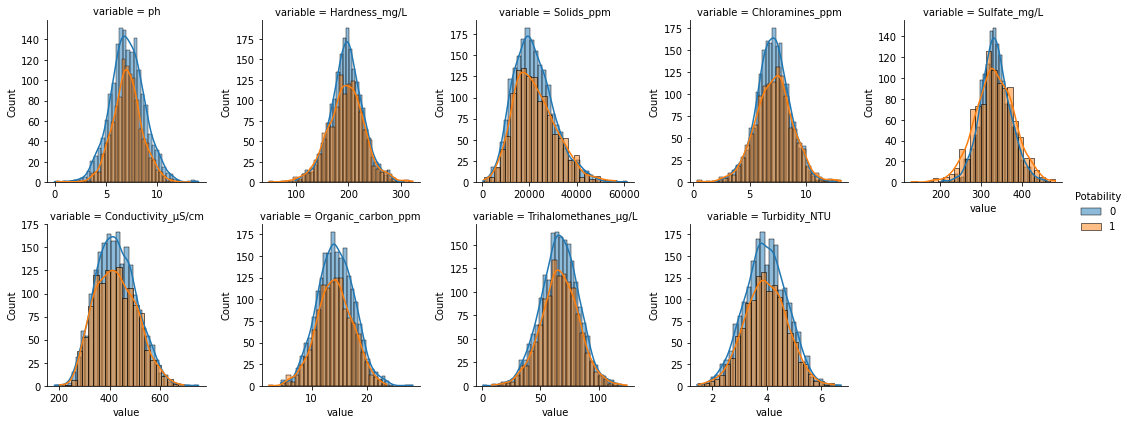

In [9]:
# Create Histogram Target `death`

output = 'Potability'
cols = [ f for f in dataset.columns if dataset.dtypes[ f ] != "object"]
f = pd.melt( dataset, id_vars=output, value_vars=cols)
g = sns.FacetGrid( f, hue=output, col="variable", col_wrap=5, sharex=False, sharey=False )
g = g.map( sns.histplot, "value", kde=True).add_legend()

> Pemilihan Univariate diperlukan untuk melihat potability pada beberapa feature, sehingga dalam EDA dapat memberikan insight pada data yang masih mentah
> Dari 9 parameter untuk menentukan Potability, semua parameter mnunjukkan bahwa dari sampel banyak yang tidak lolos dalam lab dibanding yang lolos lab.


In [10]:
# grouping age vs death
data_df = dataset.groupby(by=["Turbidity_NTU", "Hardness_mg/L"]).Potability.agg(["sum"]).reset_index()
data_df

,Turbidity_NTU,Hardness_mg/L,sum
0,1.450000,162.184382,0
1,1.492207,185.825726,1
2,1.496101,210.279210,0
3,1.641515,208.668172,1
4,1.659799,179.756708,1
...,...,...,...
3271,6.357439,165.436093,0
3272,6.389161,168.445358,1
3273,6.494249,213.363545,1
3274,6.494749,190.662804,0


> data pada kolom `Turbidity(NTU)`, `Hardness(mg/L)` menujukkan tidak terdapat angka yang sama. Kemungkinan besar tidak ada sample yang duplicate.


In [11]:
# total per Potability
dataset.Potability.value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

> Potability yang menunjukkan bahwa ada kemungkinan (1) dapat diminum ada 1278 sample dana (0) tidak da[at diminum 1998 sample air. Ada potensi dari 1278 sampel tersebut diambil di titik dekat dengan mata air.

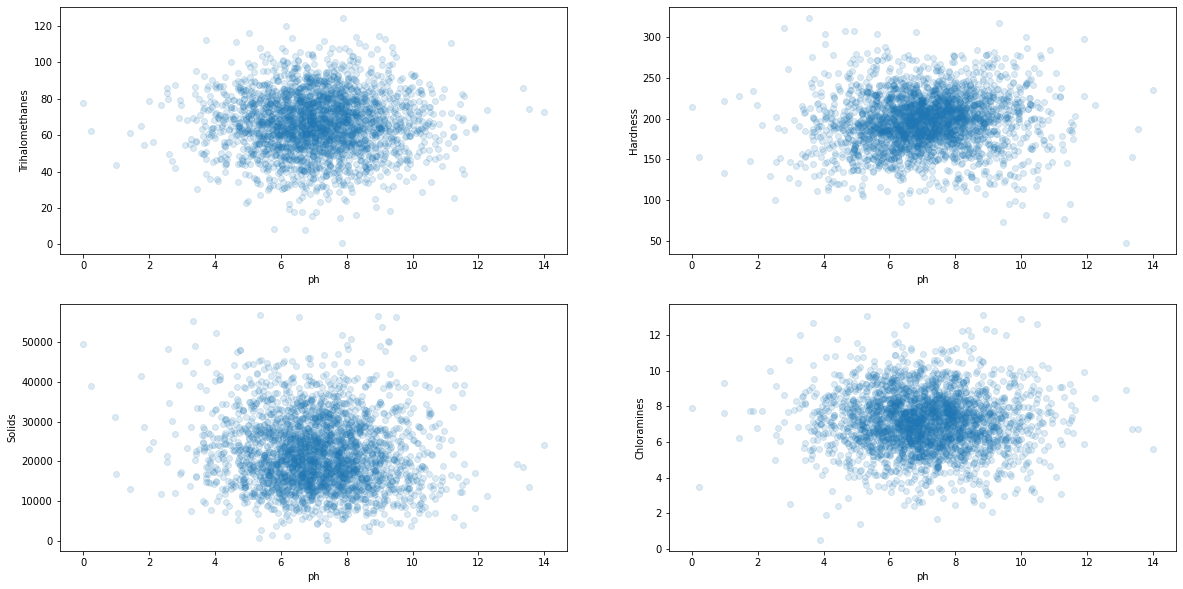

In [12]:
# Create plot analysis

plt.figure(figsize=(20,10))
columns = ['Trihalomethanes','Hardness', 'Solids','Chloramines']
n = 1
for x in columns:
    plt.subplot(2, 2, n)
    plt.scatter(data['ph'], data[x], alpha=0.15)
    plt.xlabel('ph')
    plt.ylabel(x)
    n=n+1

plt.ticklabel_format(useOffset=False, style='plain')
plt.show()

In [13]:
# Groupby menggunakan ph, Trihalomethanes, Hardness, Solids, dan Chloramines

data[
     (data["ph"] >= 6.5) &
     (data["ph"] <= 8.5) &
     (data["Trihalomethanes"] < 80) &
     (data["Hardness"] < 100) &
     (data["Solids"] > 500) &
     (data["Solids"] < 1000) &
     (data["Chloramines"] < 4)
]

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability


> Dari scatterplot dana goup data, range ph yang di rekomendasikan oleh WHO ada diangka 6.5 - 8.5, jika semua feature di combine dengan nilai aman yang disarankan , maka hasil nya tidak keluar. Sehingga perlu ditinjau menggunakan variabel pendukung lainnya.

**Multivariate Analysis**

Text(0.5, 1.0, 'Correlation Heatmap')

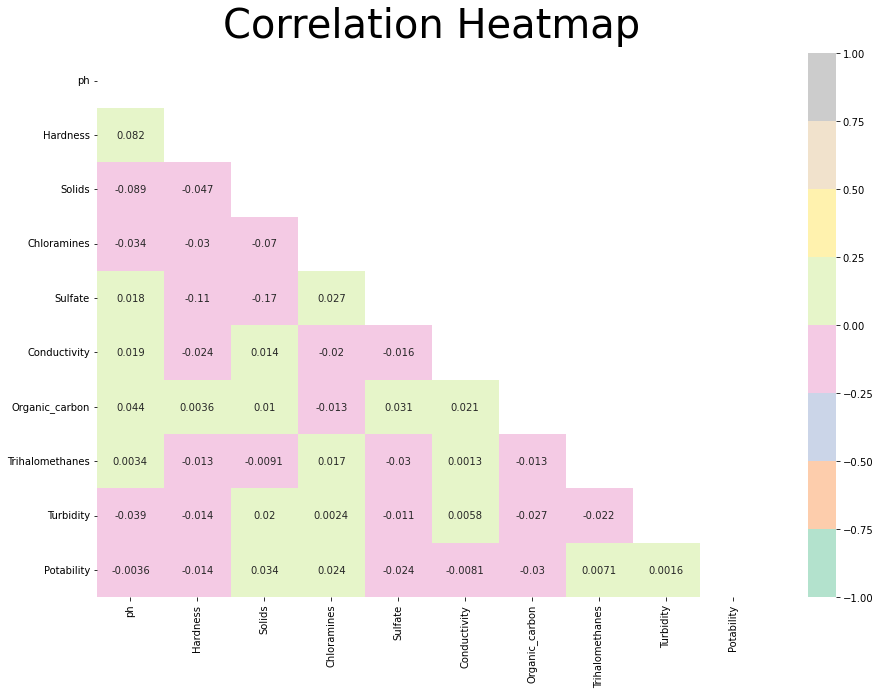

In [14]:
# Check Korelasi antara Potability (kolom target) dengan semua Features
plt.subplots(figsize=(15,10))
mask = np.triu(np.ones_like(data.corr()))
heatmap = sns.heatmap(data.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='Pastel2')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':40}, pad=16)

Strong Correlation :
1. pH sangat dipengaruhi dengan Hardness
2. Hardness dipengaruhi oleh Organic Carbon
3. Solids dipengaruhi oleh Turbidity,
4. Chloramines dipengaruhi oleh Sulfate,
5. Sulfate dipengaruhi oleh Organic Carbon,
6. Conductivity berkorelasi dengan Organic Carbon,
7. Trihalomethanes dan Turbiduty berkolasi dengan target yaitu Potability
8. Potability mempunya korelasi yang tinggi terhadap Solids, Chloramines, Trihalomethanese, dan Turbidity

Weak Correlation :
1. Organic Carbon berkorelasi Trihalomethanes 

<AxesSubplot:title={'center':'Correlation with Potability'}>

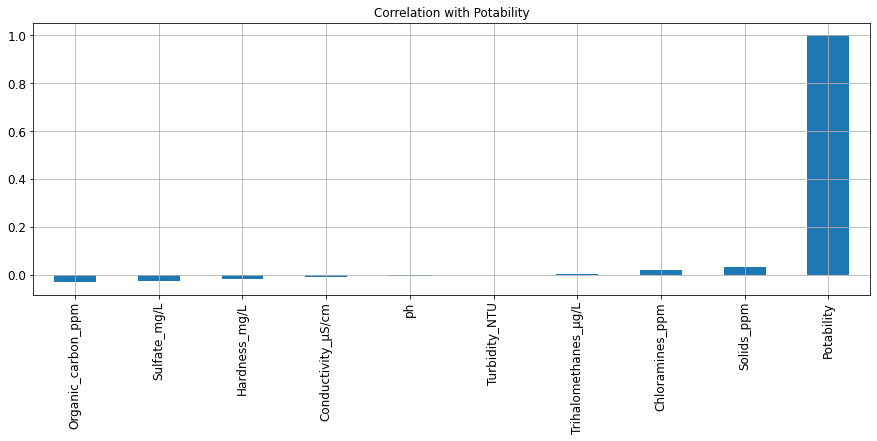

In [15]:
# Feature Importance

dataset.corrwith(dataset['Potability']).sort_values().plot.bar(figsize=(15,5), title='Correlation with Potability', fontsize=12, grid=True)

> - Beberapa features menentukan nilai Potability, dari 9 features, 3 features yang mempunyai impact dalam penentuan Potability, dan 4 features yang tidak memiliki impact penentuan Potability.
> - Karena potability menjadi tolok ukur dalam pengukuran Air minum, sehingga feature yang tidak perlu di drop, supaya kita fokus pada data yang memiliki korelasi terhadap target.

# 5 - Data Preprocessing

**Data Splitting**

Pada data splitting akan dibagi menjadi 3
1. Inference Set : 
2. Train Set : digunakan untuk melatih algoritma dalam mencari model yang sesuai,
3. Test Set : dipakai untuk menguji dan mengetahui performa model yang didapatkan pada tahapan testing

Proporsi split data 80% untuk train-set dan 20% untuk test-set

#### Inference Dataset

In [16]:
# data inference
data_inf = dataset.sample(15, random_state=5)

In [17]:
# Remove Inference-Set from Dataset

data_train_test = dataset.drop(data_inf.index)

In [18]:
# Reset Index

data_train_test.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)

#### Splitting Dataset

In [19]:
# Split data into X and y
# Data yang akan digunakan diluar data target
X = data_train_test.drop("Potability", axis=1)

# Data yang memiliki target
y = data_train_test["Potability"]

In [20]:
# Split into train & test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,)
print('Train Size : ', X_train.shape)
print('Test Size : ', X_test.shape)

Train Size :  (2608, 9)
Test Size :  (653, 9)


#### Outlier Detection

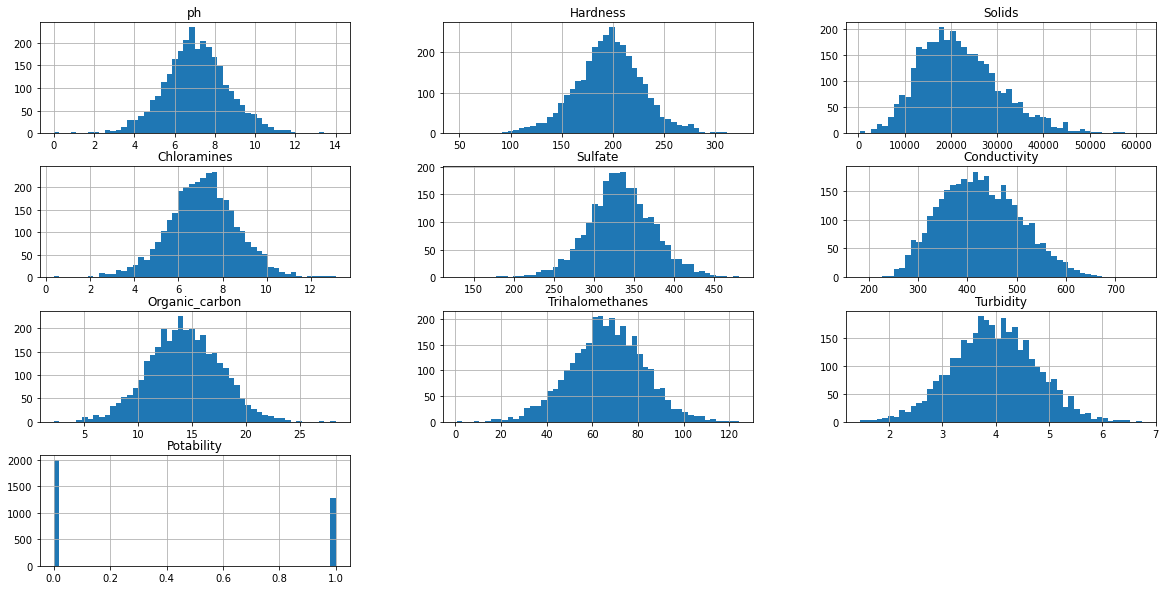

In [21]:
# Outliers
histOut = data.hist(bins=50, figsize=(20,10))
histOut
plt.show()

In [22]:
def find_outlier(data, feature):
    print('OUTLIER ' + feature)
    q1 = data[feature].quantile(0.25)
    q3 = data[feature].quantile(0.75)
    iqr = q3 - q1
    limit = iqr*1.5
    print(f'IQR : {iqr}')

    Lower_limit = q1 - limit
    Upper_limit = q3 + limit

    total_count = Lower_limit + Upper_limit
    percentage = format(len(data[data[feature] > Upper_limit])/len(data)*100)

    print(f'Lower_Limit : {Lower_limit}')
    print(f'Upper_limit : {Upper_limit}')
    print(f'Percentage : {percentage}')
    print('----------------------------------------------------------')

In [23]:
for i in data :
    find_outlier (data, i)

OUTLIER ph
IQR : 1.9689742089266105
Lower_Limit : 3.1396306008319446
Upper_limit : 11.015527436538386
Percentage : 0.7631257631257631
----------------------------------------------------------
OUTLIER Hardness
IQR : 39.81691833734635
Lower_Limit : 117.12516037150485
Upper_limit : 276.3928337208903
Percentage : 1.1904761904761905
----------------------------------------------------------
OUTLIER Solids
IQR : 11666.071830473964
Lower_Limit : -1832.4174487462951
Upper_limit : 44831.86987314956
Percentage : 1.4346764346764347
----------------------------------------------------------
OUTLIER Chloramines
IQR : 1.9874662766177282
Lower_Limit : 3.1462213405647073
Upper_limit : 11.09608644703562
Percentage : 0.9157509157509158
----------------------------------------------------------
OUTLIER Sulfate
IQR : 52.25067255002466
Lower_Limit : 229.32348900968265
Upper_limit : 438.3261792097813
Percentage : 0.6105006105006106
----------------------------------------------------------
OUTLIER Conducti

> Data yang dideteksi sebagai outliers dibiarkan, karena merupakan hasil dari uji alat. jika dihandling, ada kemungkinan nilai berubah dan itu bisa menjadi risiko jika pada data asli merupakan nilai yang tidak direkomendasikan (layak minum), tetapi menjadi salah satu parameter yang menajdikannya layak. 

**Missing Values**


In [24]:
# Detect Missing Values

def missing_values_table_(data) :

    # Total missing values
    mis_val = dataset.isnull().sum()

    # Precentage of missing values
    mis_val_percent = 100 * dataset.isnull().sum() / len(dataset)

    # Make a table with the result
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis = 1)

    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values'})

    # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:,1] !=0].sort_values('% of Total Values', ascending=False).round(1)

    # Print some summary information
    print ("Your selected dataframe has " + str(dataset.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")

    # Return the dataframe with missing information
    return mis_val_table_ren_columns

**Missing Values pada X_train**

In [25]:
# Missing Values X_train

train_missing = missing_values_table_(X_train)
train_missing

Your selected dataframe has 10 columns.
There are 3 columns that have missing values.


,Missing Values,% of Total Values
Sulfate_mg/L,781,23.8
ph,491,15.0
Trihalomethanes_μg/L,162,4.9


**Missing Value di kolom target**

In [26]:
# Cek missing value di y_train
print('missing values di y_train :', y_train.isna().any())

# Cek missing value di X
print('missing values di y_test :', y_test.isna().any())

missing values di y_train : False
missing values di y_test : False


> Missing Values :
- Missing values terjadi di X train,di features sulfate ( 23%), ph ( 15%) dan Trihalomethanes_μg/L(4.9%),
- Missing values tidak terjadi di kollom target.

**Handling Missing Values**

Pada handling missing values disini dipilih metode drop data, dikarenakan data ini merupakan acuan bisa atau tidaknya air untuk diminum. Dengan kata lain air akan masuk ke tubuh dan ditakutkan memicu penyakit jika salah dalam prediksi.

In [27]:
# solution

data["Sulfate"].fillna(data["Sulfate"].mode(), inplace=True)
data["ph"].fillna(data["ph"].mode(), inplace=True)
data["Trihalomethanes"].fillna(data["Trihalomethanes"].mode(), inplace=True)

In [28]:
# Before Handling
print('y_train before handling : ', X_train.shape)
print('y_test before handling : ', X_test.shape)

# Handling Missing Value
X_train.dropna(inplace=True)
X_test.dropna(inplace=True)

# Handle missing value in the features
y_train = y_train[y_train.index.isin(X_train.index)]
y_test = y_test[y_test.index.isin(X_test.index)]

# After Handling
print('y_train after handling missing value : ', X_train.shape)
print('y_test after handling missing value : ', X_test.shape)

y_train before handling :  (2608, 9)
y_test before handling :  (653, 9)
y_train after handling missing value :  (1591, 9)
y_test after handling missing value :  (410, 9)


#### Feature Selection

In [29]:
# Display X_train

X_train

,ph,Hardness_mg/L,Solids_ppm,Chloramines_ppm,Sulfate_mg/L,Conductivity_μS/cm,Organic_carbon_ppm,Trihalomethanes_μg/L,Turbidity_NTU
2339,6.747415,250.419555,24539.713165,2.397985,358.229866,339.344740,15.357290,59.990770,3.377451
232,3.664711,201.097316,28102.756625,5.682035,330.023531,291.148449,17.470631,75.101801,3.316158
2851,9.001823,263.514188,15379.912763,6.473674,355.006426,561.687003,22.045457,61.514342,3.976873
3078,9.537879,200.557507,20044.206252,7.078690,303.919341,335.554803,16.636174,71.309022,3.024557
2748,6.393231,185.836158,17258.114035,7.329999,330.132139,326.427055,11.650393,47.640014,3.644388
...,...,...,...,...,...,...,...,...,...
151,4.801154,180.772871,13556.734397,8.977286,322.062447,587.395012,12.401368,62.028187,4.418638
3236,4.825591,234.783904,11142.392632,6.442769,370.416831,370.188948,13.046355,46.315992,3.463097
774,5.352566,150.495214,27795.732041,5.464058,445.938391,422.422509,16.144510,78.374845,4.779187
1033,8.124208,207.509515,26489.114701,8.540837,318.059624,431.625677,10.075598,63.984225,4.724457


**Split between Numerical Columns and Categorical Columns**

In [30]:
# Get Numerical Columns and Categorical Columns

num_columns = X_train.select_dtypes(include=np.number).columns.tolist()
cat_columns = X_train.select_dtypes(include=['object']).columns.tolist()

print('Numerical Columns : ', num_columns)
print('Categorical Columns : ', cat_columns)

Numerical Columns :  ['ph', 'Hardness_mg/L', 'Solids_ppm', 'Chloramines_ppm', 'Sulfate_mg/L', 'Conductivity_μS/cm', 'Organic_carbon_ppm', 'Trihalomethanes_μg/L', 'Turbidity_NTU']
Categorical Columns :  []


In [31]:
# Split Train-Set and Test-Set based on Column Type

X_train_num = X_train[num_columns]

X_test_num = X_test[num_columns]

> X_train_num dan X_test_num digunakan saat menggunakan scaler.

In [32]:
# Feature Scaling using MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train_num)

X_train_final = scaler.transform(X_train_num)
X_test_final = scaler.transform(X_test_num)

> Untuk feature Selection tidak menggunakan Encoding, karena data yang digunakan sudah berbentuk angka semua.

# 6 - Model Definition

Algoritma yang dipakai adalah 
1. Logistic Regression
2. Decision Tree
3. Random Forest Classifier
4. KNN
5. Naive Bayes
6. Adaboost
7. KNN

**1. Logistic Regression**

In [33]:
# Model
log_reg = LogisticRegression(max_iter=100)

# Model Pipeline
pipe_LR = Pipeline([('preprocessing', MinMaxScaler()), ('logreg', LogisticRegression())])

# Hyperparameter
param_log_reg = [    
                {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
                'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
                'max_iter' : [10, 100]}
                ]

**2. Dicision Tree Classifier**

In [34]:
# Model
DT = DecisionTreeClassifier(random_state=15)

# Model Pipeline
pipe_DT = Pipeline(steps=[('scaler', MinMaxScaler()), ('DT', DecisionTreeClassifier())])

# Hyperparameter
param_DT = {'max_depth': [2, 3, 5, 10, 20],
            'min_samples_leaf': [5, 10, 20, 50, 100],
            'criterion': ["gini", "entropy"]}

**3. Random Forest Classifier**

In [35]:
# Model
RF = RandomForestClassifier(random_state=15)

# Hyperparameter
param_RF = {'n_estimators' : [5, 20, 50],
            'max_depth' : [1, 2, 3],
            'max_features' : ["sqrt", "auto"],
            'criterion': ['gini','entropy']}

**4. Naive Bayes**

In [36]:
# Model
g_NB = GaussianNB()

# Hyperparameter
param_g_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

**5. Adaboost**

In [37]:
# Model
Ada = AdaBoostClassifier(random_state=15)

# Model Pipeline
pipe_Ada = Pipeline([('preprocessing', scaler),
            ('Ada', Ada)])

# Hyperparameter
param_Ada = {'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 20, 30],
                'learning_rate': [0.1, 0.5, 1, 10, 50],
                'algorithm': ['SAMME', 'SAMME.R']}

**6. KNN**

In [38]:
# Model
KNN = KNeighborsClassifier()

# Hyperparameter
param_KNN = {'n_neighbors': [1, 5, 7, 9, 11, 13, 15]}

# 7 - Model Training

Pada sub bab ini berisikan Model Training menggunakan Cross Validation untuk mengevaluasi kinerja model dan Hyperparameter Tuning


In [39]:
# Cross Validation

num_folds = 100
seed = 7
scoring = 'f1_macro'
ensemble = []
ensemble.append(('log_reg', LogisticRegression()))
ensemble.append(('DT', DecisionTreeClassifier()))
ensemble.append(('RF', RandomForestClassifier()))
ensemble.append(('g_NB', GaussianNB()))
ensemble.append(('Ada', AdaBoostClassifier()))
ensemble.append(('KNN', KNeighborsClassifier()))

results = []
names = []
for name, model in ensemble:
    model.fit(X_train, y_train)
    kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s %f %f "%(name, cv_results.mean(), cv_results.std())
    print(msg)

log_reg 0.371375 0.053298 
DT 0.578007 0.117671 
RF 0.629495 0.123619 
g_NB 0.531555 0.119841 
Ada 0.507691 0.138116 
KNN 0.497057 0.115549 


# 8 - Model Evaluation

**Hyperparameter tuning with RandomizedSearchCV**

We're going to tune:
1. Logistic Regression
2. Decision Tree
3. Random Forest Classifier
4. Naive Bayes
5. Adaboost
6. KNN

**1. Logistic Regression**

In [40]:
# Hyperparameter Log_reg

grid_LR = GridSearchCV(estimator=log_reg, 
                        param_grid=param_log_reg, 
                        cv=4, n_jobs=-1, verbose=1, scoring = "f1_macro")
grid_LR.fit(X_train_final, y_train)

best_estimator_LR = grid_LR.best_estimator_
best_param_LR = grid_LR.best_params_
print(best_param_LR)

Fitting 4 folds for each of 40 candidates, totalling 160 fits


/Users/macpro/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/macpro/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/macpro/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/macpro/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/macpro/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/macpro/opt/anaconda3/lib/python3.9/site-packages/sklearn/linea

{'max_iter': 10, 'penalty': 'none', 'solver': 'sag'}


**2. Decision Tree**

In [41]:
# Hyperparameter Decision Tree

grid_DT = GridSearchCV(estimator=DT, 
                        param_grid=param_DT, 
                        cv=4, n_jobs=-1, verbose=1, scoring = "f1_macro")
grid_DT.fit(X_train_final, y_train)

best_estimator_DT = grid_DT.best_estimator_
best_param_DT = grid_DT.best_params_
print(best_param_DT)

Fitting 4 folds for each of 50 candidates, totalling 200 fits
{'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 10}


**3. Random Forest Classifier**

In [42]:
# Hyperparameter Random Forest Classifier

grid_RF = GridSearchCV(estimator=RF, 
                        param_grid=param_RF, 
                        cv=4, n_jobs=-1, verbose=1, scoring = "f1_macro")
grid_RF.fit(X_train_final, y_train)

best_estimator_RF = grid_RF.best_estimator_
best_param_RF = grid_RF.best_params_
print(best_param_RF)

Fitting 4 folds for each of 36 candidates, totalling 144 fits
{'criterion': 'entropy', 'max_depth': 3, 'max_features': 'sqrt', 'n_estimators': 5}


**4 - Gaussian NB**

In [43]:
# Hyperparameter Gaussian Naive Bayes

grid_g_NB = GridSearchCV(estimator=g_NB, 
                        param_grid=param_g_NB, 
                        cv=3, n_jobs=-1, verbose=1, scoring = "f1_macro")
grid_g_NB.fit(X_train_final, y_train)

best_estimator_g_NB = grid_g_NB.best_estimator_
best_param_g_NB = grid_g_NB.best_params_
print(best_param_g_NB)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
{'var_smoothing': 0.0005336699231206307}


**5 - Adaboost**

In [44]:
# Hyperparameter Adaboost

grid_Ada = GridSearchCV(estimator=Ada, 
                        param_grid=param_Ada, 
                        cv=3, n_jobs=-1, verbose=1, scoring = "f1_macro")
grid_Ada.fit(X_train_final, y_train)

best_estimator_Ada = grid_Ada.best_estimator_
best_param_Ada = grid_Ada.best_params_
print(best_param_Ada)

Fitting 3 folds for each of 140 candidates, totalling 420 fits


/Users/macpro/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:655: RuntimeWarning: overflow encountered in exp
  sample_weight = np.exp(
/Users/macpro/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:486: UserWarning: Sample weights have reached infinite values, at iteration 3, causing overflow. Iterations stopped. Try lowering the learning rate.
  return super().fit(X, y, sample_weight)
/Users/macpro/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:655: RuntimeWarning: overflow encountered in exp
  sample_weight = np.exp(
/Users/macpro/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:486: UserWarning: Sample weights have reached infinite values, at iteration 3, causing overflow. Iterations stopped. Try lowering the learning rate.
  return super().fit(X, y, sample_weight)
/Users/macpro/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:655

{'algorithm': 'SAMME.R', 'learning_rate': 1, 'n_estimators': 5}


/Users/macpro/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:606: RuntimeWarning: overflow encountered in exp
  sample_weight *= np.exp(
/Users/macpro/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:486: UserWarning: Sample weights have reached infinite values, at iteration 1, causing overflow. Iterations stopped. Try lowering the learning rate.
  return super().fit(X, y, sample_weight)
/Users/macpro/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:606: RuntimeWarning: overflow encountered in exp
  sample_weight *= np.exp(
/Users/macpro/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:486: UserWarning: Sample weights have reached infinite values, at iteration 1, causing overflow. Iterations stopped. Try lowering the learning rate.
  return super().fit(X, y, sample_weight)
/Users/macpro/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:6

**6 - KNN**

In [45]:
# Hyperparameter KNN

grid_KNN = GridSearchCV(estimator=KNN, 
                        param_grid=param_KNN, 
                        cv=3, n_jobs=-1, verbose=1, scoring = "f1_macro")
grid_KNN.fit(X_train_final, y_train)

best_estimator_KNN = grid_KNN.best_estimator_
best_param_KNN = grid_KNN.best_params_
print(best_param_KNN)

Fitting 3 folds for each of 7 candidates, totalling 21 fits
{'n_neighbors': 1}


***Model Evaluation - Random Forest Classifier***

In [46]:
# Classification Report
print('---------- Train-set Random Forest Classifier Classification Report ---------')
print(classification_report(y_train, best_estimator_RF.predict(X_train_final), target_names=['Not Death', 'Death']))
print('---------- Test-set Random Forest Classifier Classification Report ---------')
print(classification_report(y_test, best_estimator_RF.predict(X_test_final), target_names=['Not Death', 'Death']))

# Performance Metrics
print('---------- Train-set RF Performance ---------')
print(roc_auc_score(y_train, best_estimator_RF.predict(X_train_final)))
print('---------- Test-set RF Performance ---------')
print(roc_auc_score(y_test, best_estimator_RF.predict(X_test_final)))

---------- Train-set Random Forest Classifier Classification Report ---------
              precision    recall  f1-score   support

   Not Death       0.62      0.97      0.75       937
       Death       0.76      0.13      0.22       654

    accuracy                           0.63      1591
   macro avg       0.69      0.55      0.49      1591
weighted avg       0.68      0.63      0.54      1591

---------- Test-set Random Forest Classifier Classification Report ---------
              precision    recall  f1-score   support

   Not Death       0.65      0.94      0.77       257
       Death       0.58      0.14      0.22       153

    accuracy                           0.64       410
   macro avg       0.62      0.54      0.49       410
weighted avg       0.62      0.64      0.56       410

---------- Train-set RF Performance ---------
0.5513415513758204
---------- Test-set RF Performance ---------
0.5394445716029602


***Model Evaluation - Adaboost***

In [47]:
# Classification Report
print('---------- Train-set Naive Bayes Classification Report ---------')
print(classification_report(y_train, best_estimator_Ada.predict(X_train_final), target_names=['Not Death', 'Death']))
print('---------- Test-set Naive Bayes Classification Report ---------')
print(classification_report(y_test, best_estimator_Ada.predict(X_test_final), target_names=['Not Death', 'Death']))

# Performance Metrics
print('---------- Train-set Adaboost Performance ---------')
print(roc_auc_score(y_train, best_estimator_Ada.predict(X_train_final)))
print('---------- Test-set Adaboost Performance ---------')
print(roc_auc_score(y_test, best_estimator_Ada.predict(X_test_final)))

---------- Train-set Naive Bayes Classification Report ---------
              precision    recall  f1-score   support

   Not Death       0.62      0.90      0.74       937
       Death       0.60      0.21      0.31       654

    accuracy                           0.62      1591
   macro avg       0.61      0.56      0.52      1591
weighted avg       0.61      0.62      0.56      1591

---------- Test-set Naive Bayes Classification Report ---------
              precision    recall  f1-score   support

   Not Death       0.65      0.84      0.73       257
       Death       0.46      0.22      0.30       153

    accuracy                           0.61       410
   macro avg       0.55      0.53      0.52       410
weighted avg       0.58      0.61      0.57       410

---------- Train-set Adaboost Performance ---------
0.5551853955136931
---------- Test-set Adaboost Performance ---------
0.5332900994379595


> Model yang digunakan adalah Adaboost Classifier karena untuk precision (False True) basefit.


We're going to tune:
1. Logistic Regression
2. Decision Tree
3. Random Forest Classifier
4. Naive Bayes
5. Adaboost
6. KNN

In [48]:
models = [LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier(), GaussianNB()]
scores = dict()

for m in models:
    m.fit(X_train, y_train)
    y_pred = m.predict(X_test)

    print(f'model: {str(m)}')
    print(classification_report(y_test,y_pred, zero_division=1))
    print('-'*50, '\n')

model: LogisticRegression()
              precision    recall  f1-score   support

           0       0.63      1.00      0.77       257
           1       1.00      0.00      0.00       153

    accuracy                           0.63       410
   macro avg       0.81      0.50      0.39       410
weighted avg       0.77      0.63      0.48       410

-------------------------------------------------- 

model: DecisionTreeClassifier()
              precision    recall  f1-score   support

           0       0.68      0.67      0.67       257
           1       0.45      0.46      0.46       153

    accuracy                           0.59       410
   macro avg       0.57      0.57      0.57       410
weighted avg       0.59      0.59      0.59       410

-------------------------------------------------- 

model: RandomForestClassifier()
              precision    recall  f1-score   support

           0       0.72      0.83      0.77       257
           1       0.61      0.46      

In [49]:
models = [AdaBoostClassifier(), KNeighborsClassifier()]
scores = dict()

for m in models:
    m.fit(X_train, y_train)
    y_pred = m.predict(X_test)

    print(f'model: {str(m)}')
    print(classification_report(y_test,y_pred, zero_division=1))
    print('-'*50, '\n')

model: AdaBoostClassifier()
              precision    recall  f1-score   support

           0       0.64      0.75      0.69       257
           1       0.41      0.29      0.34       153

    accuracy                           0.58       410
   macro avg       0.52      0.52      0.52       410
weighted avg       0.55      0.58      0.56       410

-------------------------------------------------- 

model: KNeighborsClassifier()
              precision    recall  f1-score   support

           0       0.66      0.67      0.66       257
           1       0.42      0.41      0.42       153

    accuracy                           0.57       410
   macro avg       0.54      0.54      0.54       410
weighted avg       0.57      0.57      0.57       410

-------------------------------------------------- 



Data diatas yang digunakan merupaka precision, yang mana True Negative
paling bagus ada di model logistic regression

# 9 - Model Inference


> Dataset yang sudah diproses, mari kita coba dengan data yang baru

In [50]:
# Load Dataset

data_inf.head(15)

,ph,Hardness_mg/L,Solids_ppm,Chloramines_ppm,Sulfate_mg/L,Conductivity_μS/cm,Organic_carbon_ppm,Trihalomethanes_μg/L,Turbidity_NTU,Potability
0,5.287983,245.023461,27733.713099,7.135063,238.844004,464.074850,13.452179,55.642363,3.311034,0
1,5.729303,162.857585,34573.678786,5.654856,415.287072,297.631365,13.990842,76.744677,3.556395,1
2,6.945224,220.960041,36438.310876,5.551660,337.963891,367.997977,20.160734,53.007723,4.823082,0
3,7.086877,192.387368,25524.823470,7.354035,322.740031,548.917718,14.524408,64.124391,3.992848,0
4,4.663492,170.951830,41452.625574,8.725765,362.415419,378.149000,16.274051,60.618754,3.742293,0
5,NaN,213.652293,28266.755107,3.632114,NaN,483.797968,15.741911,78.810852,4.312290,0
6,8.249551,230.932832,32898.749368,7.019971,280.674984,364.931128,17.051185,69.781641,4.284831,1
7,NaN,173.474186,18318.720372,7.597654,282.598119,407.642962,20.200592,79.104019,4.181264,1
8,NaN,176.779947,24793.455675,6.394342,312.359148,377.066286,10.070192,50.124122,4.641041,1
9,4.725786,249.670999,20834.294278,5.036010,378.998684,411.114485,17.769641,78.817436,3.156331,1


In [51]:
# Handling Missing values

data_inf_new = data_inf.dropna(axis=0).reset_index()

In [52]:
# Split dataset X (train) dan y (target)

# X_inf
X_inf = data_inf_new.drop(['Potability'], axis=1)

# use same variables in final features
X_inf = data_inf_new[num_columns]

# y will be consist of target parameter only
y_inf = data_inf_new['Potability']

In [53]:
# Feature Scaling
scaler.fit(X_inf)
data_inf_final = scaler.transform(X_inf)
data_inf_final

array([[0.17414402, 0.94646521, 0.45868309, 0.56888688, 0.        ,
        0.66236579, 0.44200033, 0.29193558, 0.18982987],
       [0.29720953, 0.        , 0.65984064, 0.16772015, 0.90866896,
        0.        , 0.48680485, 0.9366713 , 0.32129659],
       [0.63627853, 0.6692797 , 0.71467788, 0.13975192, 0.5104602 ,
        0.2800256 , 1.        , 0.21143983, 1.        ],
       [0.67577962, 0.3401523 , 0.39372153, 0.6282327 , 0.43205843,
        1.        , 0.53118544, 0.55108566, 0.5551526 ],
       [0.        , 0.09323726, 0.86214459, 1.        , 0.63638379,
        0.32042184, 0.67671606, 0.44397849, 0.42090291],
       [1.        , 0.78415585, 0.61058239, 0.53769446, 0.2154265 ,
        0.267821  , 0.74135597, 0.72393075, 0.7115999 ],
       [0.01737099, 1.        , 0.25577707, 0.        , 0.7217864 ,
        0.45160877, 0.80111527, 1.        , 0.10693871],
       [0.56275197, 0.87146504, 0.4115843 , 0.34377592, 0.36251885,
        0.11299802, 0.        , 0.        , 0.        ],


In [54]:
# Model for Inference

g_NB.fit(X_inf, y_inf)

GaussianNB()

In [55]:
y_pred_inf = g_NB.predict(data_inf_final)
y_pred_inf

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [56]:
X_inf

,ph,Hardness_mg/L,Solids_ppm,Chloramines_ppm,Sulfate_mg/L,Conductivity_μS/cm,Organic_carbon_ppm,Trihalomethanes_μg/L,Turbidity_NTU
0,5.287983,245.023461,27733.713099,7.135063,238.844004,464.074850,13.452179,55.642363,3.311034
1,5.729303,162.857585,34573.678786,5.654856,415.287072,297.631365,13.990842,76.744677,3.556395
2,6.945224,220.960041,36438.310876,5.551660,337.963891,367.997977,20.160734,53.007723,4.823082
3,7.086877,192.387368,25524.823470,7.354035,322.740031,548.917718,14.524408,64.124391,3.992848
4,4.663492,170.951830,41452.625574,8.725765,362.415419,378.149000,16.274051,60.618754,3.742293
5,8.249551,230.932832,32898.749368,7.019971,280.674984,364.931128,17.051185,69.781641,4.284831
6,4.725786,249.670999,20834.294278,5.036010,378.998684,411.114485,17.769641,78.817436,3.156331
7,6.681554,238.512441,26132.211812,6.304459,309.237009,326.026227,8.138227,46.087260,2.956748
8,6.825468,187.051710,46140.126850,6.137757,352.702182,373.427235,12.606382,58.752201,3.027450
9,5.508156,192.226546,12137.099597,5.230477,433.021506,405.485510,8.512225,54.915130,4.571406


In [57]:
# Create Dataframe of DEATH prediction
y_pred_inf_df = pd.DataFrame(y_pred_inf, columns=['Potability - prediction'])
y_pred_inf_df

,Potability - prediction
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1


In [58]:
# Concate between Inference-Set and Rating's Prediction

data_inf_new.index = y_pred_inf_df.index
inf_final = pd.concat([data_inf_new, y_pred_inf_df], axis=1)
inf_final.T

,0,1,2,3,4,5,6,7,8,9
index,0.000000,1.000000,2.000000,3.000000,4.000000,6.000000,9.000000,12.000000,13.000000,14.000000
ph,5.287983,5.729303,6.945224,7.086877,4.663492,8.249551,4.725786,6.681554,6.825468,5.508156
Hardness_mg/L,245.023461,162.857585,220.960041,192.387368,170.951830,230.932832,249.670999,238.512441,187.051710,192.226546
Solids_ppm,27733.713099,34573.678786,36438.310876,25524.823470,41452.625574,32898.749368,20834.294278,26132.211812,46140.126850,12137.099597
Chloramines_ppm,7.135063,5.654856,5.551660,7.354035,8.725765,7.019971,5.036010,6.304459,6.137757,5.230477
Sulfate_mg/L,238.844004,415.287072,337.963891,322.740031,362.415419,280.674984,378.998684,309.237009,352.702182,433.021506
Conductivity_μS/cm,464.074850,297.631365,367.997977,548.917718,378.149000,364.931128,411.114485,326.026227,373.427235,405.485510
Organic_carbon_ppm,13.452179,13.990842,20.160734,14.524408,16.274051,17.051185,17.769641,8.138227,12.606382,8.512225
Trihalomethanes_μg/L,55.642363,76.744677,53.007723,64.124391,60.618754,69.781641,78.817436,46.087260,58.752201,54.915130
Turbidity_NTU,3.311034,3.556395,4.823082,3.992848,3.742293,4.284831,3.156331,2.956748,3.027450,4.571406


**Model Analysis :**
1. Model yang dicoba pada training adalah Logistic Regression, Decision Tree, Random Forest Classifier, Naive Bayes, Adaboost, KNN,
2. Model yang digunakan utnuk data inference Gausian Naive Bayes, dari hasil precision mendapatkan angka untuk 0 (No Potability) mendapatkan score 0.6, sednagankan untuk 1 (Potability) mendapatkan score 0.57.

**Overall Analysis :**
1. Hasil dari data inference menunjukkan bahwa beberapa yang diperkirakan tidak layak, ternyata setelah diprediksi menggunkan model machine learning bisa di rekomendasikan jadi air minum,
2. Dalam case ini akan direncanakan investasi untuk pembangunan penyedia air minum dan air bersih, untuk keseluruhan data harus di training dan dilihat pada sampel mana saja yang memang mendapatkan hasil Potability 1, sehingga bisa dijadikan rekomendasi area yang bisa menyediakan air minum dari sumber mata air,
3. Jika Potability yang didapat adalah 0, bisa dimanfaatkan untuk menjadi air bersih untuk pelanggan diluar area yang mneyediakan air minum.
4. Pada tahap ini pembangunan investasi harus ditinjau kembali terhadap data debit air dari sumber dan data calon pelanggan, apakah air tersebut bisa memenuhi kebutuhan setiap harinya.
5. Dikarenakan lokasi berada di pegunungan, diharapkan dalam proses distribusi ke pelanggan tanpa adanya bantuan pompa (untuk mengurangi biaya maintenance pompa, bahan baakar, dan pengadaan), sehingga harus memetakan letak geografis ground reservoar dan kemiringan pipa distribusi.


#### Make Pipeline


In [59]:
num_pipeline = make_pipeline(MinMaxScaler())
cat_pipeline = make_pipeline(OneHotEncoder())

data_pipeline = ColumnTransformer([('pipe_mum', num_pipeline, num_columns), ('pipe_cat', cat_pipeline, cat_columns)])

# final pipeline
final_pipeline = make_pipeline(data_pipeline, GaussianNB())

In [60]:
final_pipeline.fit(X_train, y_train)
y_pred = final_pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.83      0.74       257
           1       0.51      0.29      0.37       153

    accuracy                           0.63       410
   macro avg       0.58      0.56      0.55       410
weighted avg       0.60      0.63      0.60       410



In [61]:
with open("pipe_water.pkl", "wb") as model_file:
    pickle.dump(final_pipeline, model_file)